# 1.0 Introduction

## 1.1 Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
    
sns.set(context='notebook', style='whitegrid')

## 1.2 Loading data

Looking at the schema of each year we identified that the variable regarding the employment status is **EmploymentStatus** for 2017 survey and **Employment** for all the other surveys. Combined with the already identified variable of devtype we will load the data from all the years into a datatframe.

In [3]:
def load_data(year):
    # setting up column names according to the survey year
    employment = "EmploymentStatus" if year == 2017 else "Employment"
    devtype = "DeveloperType" if year == 2017 else "DevType"
    
    # setting the file path of the dataset
    file = str(year) + "_data.zip"
    file_path = os.path.join("data", file)
    
    # loading the data and adding the year as a column
    cols = [employment, devtype]
    df = pd.read_csv(file_path, usecols=cols)[cols]
    df.columns = ['employment', 'devtype']
    df['year'] = year
    df.dropna(inplace=True)
    
    return df

In [4]:
# loading and concatenating the data for all the selected years
data = [load_data(year) for year in range(2017, 2021)]
df = pd.concat(data, ignore_index=True)
df.head()

,employment,devtype,year
0,Employed full-time,Other,2017
1,Employed full-time,Mobile developer; Graphics programming; Deskto...,2017
2,Employed full-time,Web developer,2017
3,Employed full-time,Web developer; Mobile developer,2017
4,"Independent contractor, freelancer, or self-em...",Mobile developer; Desktop applications developer,2017


# 2.0 Differences between Data Scientists and Other Developers

## 2.1 Identifying Data Scientists

Here we are replicating the figure generated in another notebook. This is just a process to validate our data wrangling in this notebok that is a little bit different from the other one. From the figure bellow we can see that with different steps we achieved the same result.

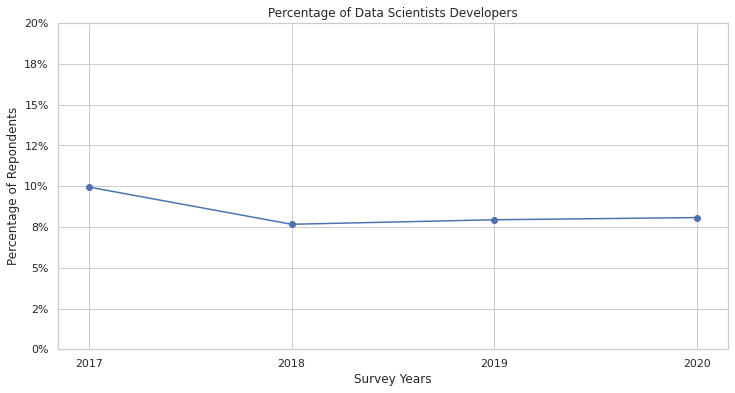

In [5]:
# identifying data scientists
df['data_science'] = df['devtype'].str.contains('Data scientist|Machine learning')

# ploting the evol of the share of data scientists
ax = df.groupby('year')['data_science'].mean().plot(figsize=(12, 6), marker='.', markersize=12)
plt.ylim(0, 0.2)
plt.xticks([2017, 2018, 2019, 2020])
ax.yaxis.set_major_formatter(lambda x, p: f'{x:.0%}')
plt.xlabel('Survey Years')
plt.ylabel('Percentage of Repondents')
plt.title('Percentage of Data Scientists Developers')
plt.show()

Here we also have not so many good news for Data Scients. For all the years, the group of data scientists developers had a greater unemployment rate compared to the others.

In [27]:
(df.groupby(['data_science', 'year'])
 ['employment'].value_counts(normalize=True)
 [:,:, "Not employed, but looking for work"].
 rename('percent').reset_index().
 pivot(index="year", values="percent", columns="data_science"))

data_science,False,True
year,,
2017,0.012204,0.018915
2018,0.059030,0.082759
2019,0.065442,0.083282
2020,0.037834,0.056921


In [12]:
employment_distribution = (df.groupby(['data_science', 'year'])['employment'].
                           value_counts(normalize=True).rename('percent').reset_index())
unemployed_select = employment_distribution['employment'] == "Not employed, but looking for work"
unemployed_evol = (employment_distribution.loc[unemployed_select].
                   pivot(index='year', values='percent', columns='data_science'))

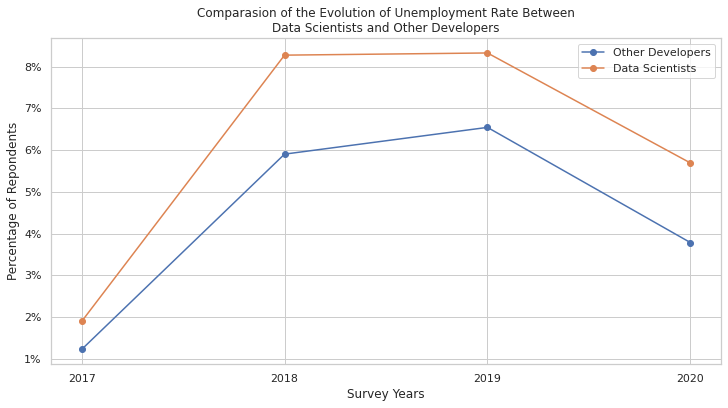

In [13]:
ax = unemployed_evol.plot(figsize=(12, 6), marker='.', markersize=12)
ax.yaxis.set_major_formatter(lambda x, p: f'{x:.0%}')
plt.legend(['Other Developers', 'Data Scientists'])
plt.xticks([2017, 2018, 2019, 2020])
plt.xlabel('Survey Years')
plt.ylabel('Percentage of Repondents')
plt.title('Comparasion of the Evolution of Unemployment Rate Between\nData Scientists and Other Developers')
plt.show()

In [17]:
(unemployed_evol[True] - unemployed_evol[False]).mul(100).round(2)

year
2017    0.67
2018    2.37
2019    1.78
2020    1.91
dtype: float64

Systematically being higher for data scientist with the higher difference in 2018 (2.37p.p.).  

In [8]:
(df.groupby('data_science')['employment'].
 value_counts(normalize=True)[:, "Not employed, but looking for work"].
 mul(100).round(2).to_frame('Percent Unemployed'))

,Percent Unemployed
data_science,
False,5.06
True,6.71
